In [7]:
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/accidents_parsed.csv', sep=';')


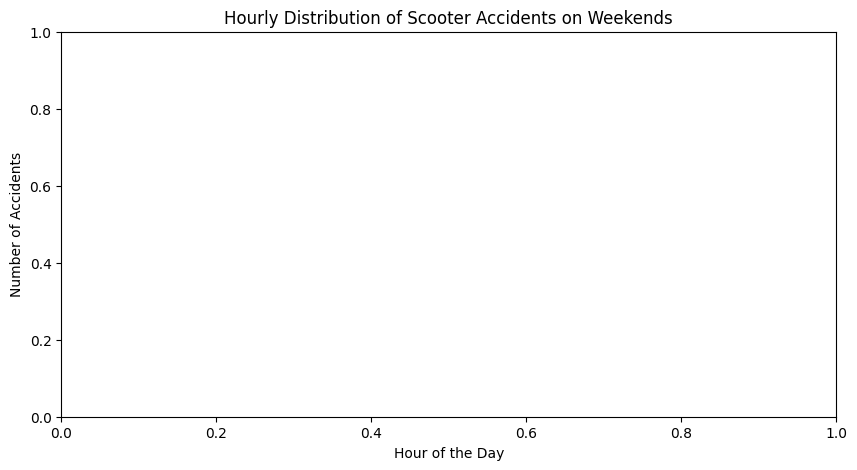

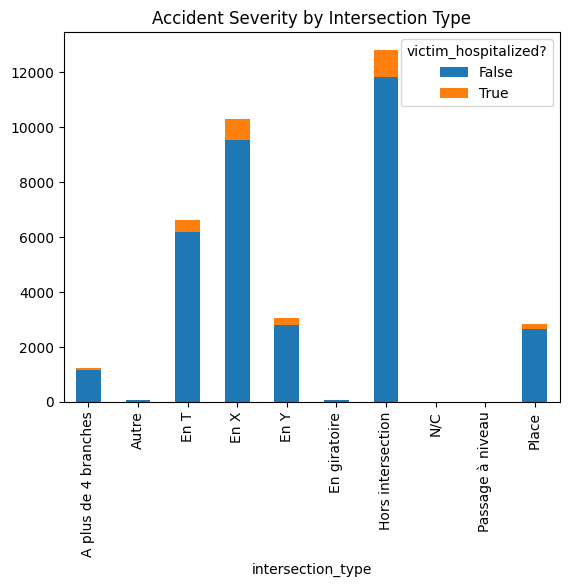

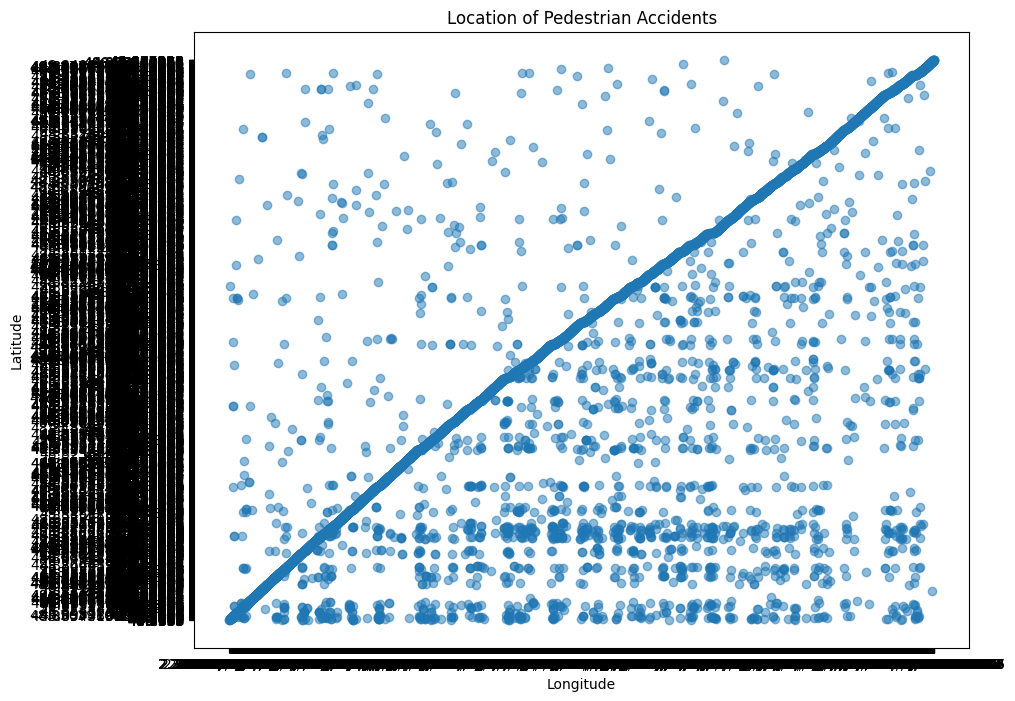

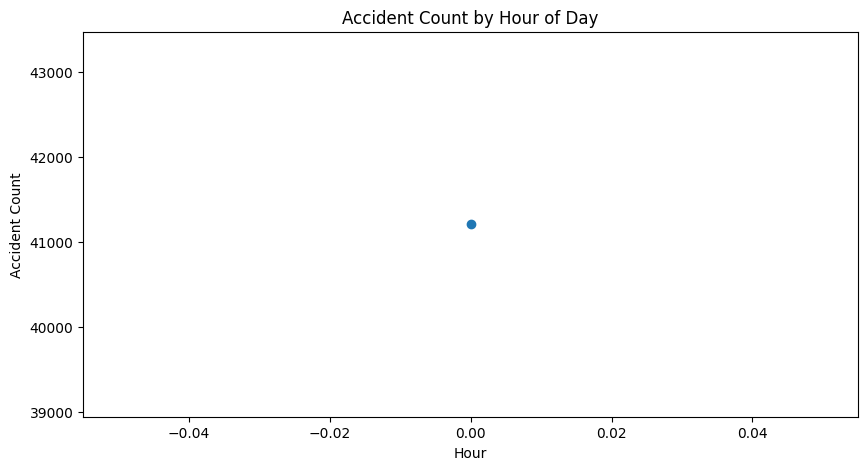

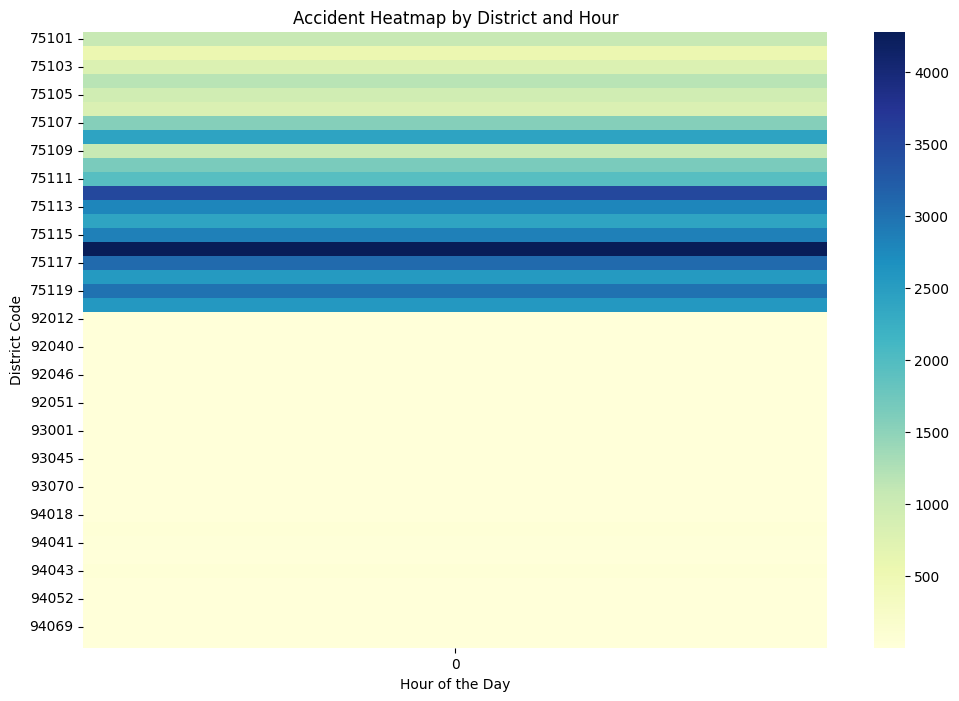

ValueError: Unknown format code 'd' for object of type 'float'

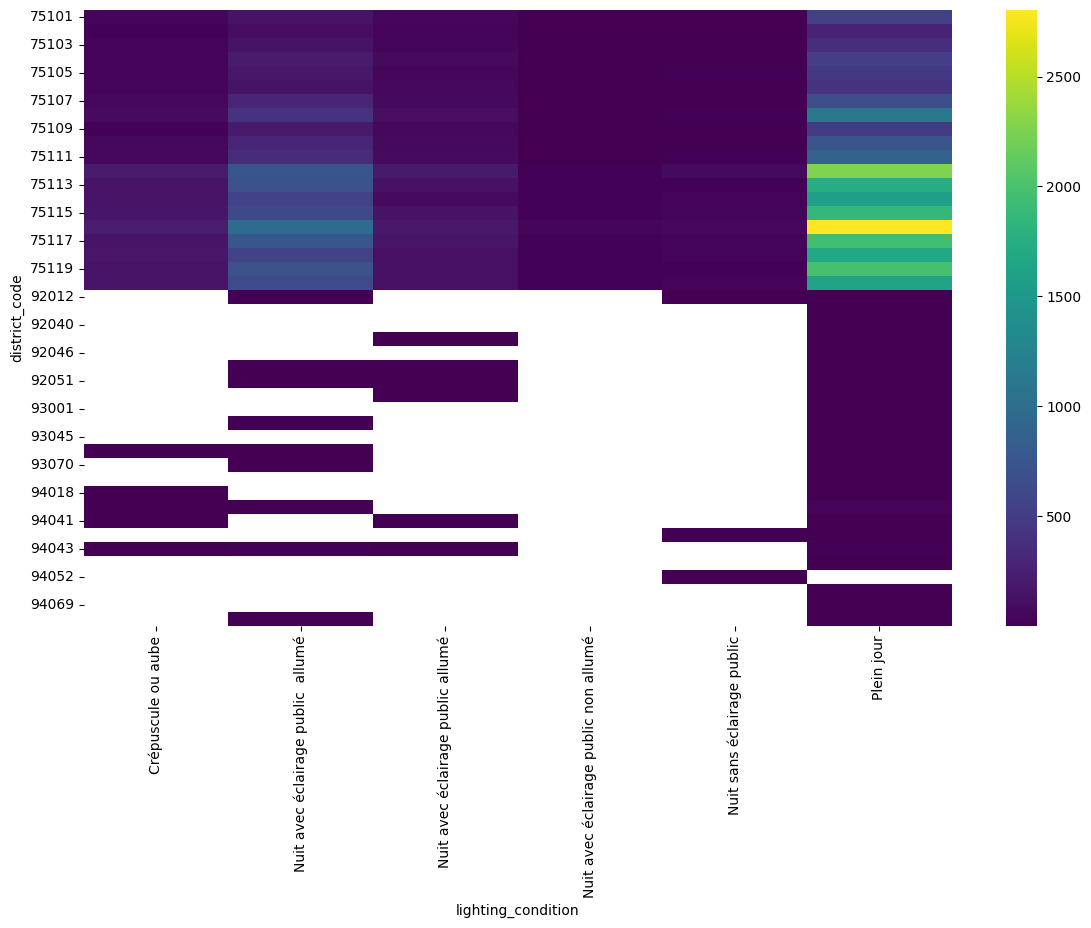

In [9]:

df['accident_date'] = pd.to_datetime(df['accident_date'])
df['hour'] = df['accident_date'].dt.hour
df['day_of_week'] = df['accident_date'].dt.dayofweek


# --- Severe Accidents ---
severe_accidents = df[df['victim_hospitalized?'] == True]

# --- Time of Day/Day of Week Interaction ---
# Example: Accidents involving '2 Roues Motorisées' on weekends
weekend_accidents = df[df['day_of_week'].isin([4, 5, 6])]  # Friday, Saturday, Sunday
scooter_accidents = weekend_accidents[weekend_accidents['first_vehicle'].str.contains('2 Roues Motorisées', na=False)]
hourly_scooter_accidents = scooter_accidents.groupby('hour')['accident_ID'].count()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_scooter_accidents.index, y=hourly_scooter_accidents.values)
plt.title('Hourly Distribution of Scooter Accidents on Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

# --- Intersection Type Analysis ---
# Example: Intersection types and accident severity
intersection_severity = df.groupby(['intersection_type', 'victim_hospitalized?'])['accident_ID'].count().unstack()
intersection_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Intersection Type')
plt.show()

# --- Pedestrian/Cyclist Hotspots ---
pedestrian_accidents = df[df['victim_transport_mode'] == 'Piéton']
# (Similar for cyclists using 'Vélo' in 'victim_transport_mode')

# Basic scatter plot (can be improved with heatmaps or clustering)
plt.figure(figsize=(10, 8))
plt.scatter(pedestrian_accidents['longitude'], pedestrian_accidents['latitude'], alpha=0.5)
plt.title('Location of Pedestrian Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# --- Correlation Graph Example ---
# Example: Hour of day vs. accident count
hourly_accidents = df.groupby('hour')['accident_ID'].count()
plt.figure(figsize=(10, 5))
plt.scatter(hourly_accidents.index, hourly_accidents.values)
plt.title('Accident Count by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.show()

# ---heatmap creation by district code and lighting conditions---
# Convert 'accident_date' to datetime and extract the hour
df['accident_date'] = pd.to_datetime(df['accident_date'])
df['hour'] = df['accident_date'].dt.hour

# Aggregate data by district and hour
heatmap_data = df.groupby(['district_code', 'hour'])['accident_ID'].count().unstack()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title('Accident Heatmap by District and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('District Code')
plt.show()

# ---heatmap creation by district code and lighting conditions---
# Aggregate data by district and lighting condition
heatmap_data_lighting = df.groupby(['district_code', 'lighting_condition'])['accident_ID'].count().unstack()

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_lighting, cmap="viridis", annot=True, fmt="d")
plt.title('Accident Heatmap by District and Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('District Code')
plt.show()